<h2>Import bibliotek</h2>

In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

<h2>Zadanie</h2>

<h3>Układ drapieżca ofiara - opisany modelem Lotki-Volterry:</h3>

<h3>$x' = x(\alpha_1 - \beta_1y)$</h3>

<h3>$y' = y(-\alpha_2 + \beta_2x)$</h3>

<h3>$x(t)$ - gęstość ofiar (np. zając/jednostka powierzchni) od czasu</h3>

<h3>$y(t)$ - gęstość drapieżców (np. ryś/jednostka powierzchni) od czasu</h3>

<h3>$\alpha_1$ - wpółczynnik przyrostu ofiar w izolowanym środowisku</h3>

<h3>$\alpha_2$ - współczynnik ubywania drapieżców w izolowanym środowisku</h3>

<h3>$\beta_1$ - współczynnik intensywności kontaktów między drapieżcami, a ofiarami, kończących się upolowaniem ofiary</h3>

<h3>$\beta_2$ - współczynnik opisujący wpływ obecności ofiar na współczynnik przyrostu drapieżców</h3>

Definicja funkcji

In [23]:
# define x'
def dx(x, a1, b1, y):
    return x*(a1 - b1*y)

# define y'
def dy(y, a2, b2, x):
    return y*(-a2 + b2*x)

Definicja wartości początkowych, parametrów oraz zakresu całkowania

In [24]:
# define range
t0 = 0
t_end = 80
# define initial values
x0 = 20
y0 = 20
# define parameters
alpha1 = 1
beta1 = 0.1
alpha2 = 0.5
beta2 = 0.02

Definicja funkcji rozwiązującej układ:

In [53]:
# define methods
EXPLICIT = 0
IMPLICIT = 1
HALF = 2
RK4 = 3
method_names = ["Euler explicit", "Euler implicit", "Euler half-explicit", "RK4"]

# solve
def solve_system(t0, t_end, x0, y0, a1, b1, a2, b2, h, method, implicit_iters=10):
    ts = [t0]
    xs = [x0]
    ys = [y0]
    tn = t0
    xn = x0
    yn = y0
    while tn < t_end:
        t_next = tn + h
        if method == EXPLICIT:
            x_next = xn + h*dx(xn, a1, b1, yn)
            y_next = yn + h*dy(yn, a2, b2, xn)
        elif method == IMPLICIT:
            # iterate to find x_next and y_next
            x_next = xn
            y_next = yn
            for i in range(implicit_iters):
                x_next_temp = xn + h*dx(x_next, a1, b1, y_next)
                y_next = yn + h*dy(y_next, a2, b2, x_next)
                x_next = x_next_temp
        elif method == HALF:
            # analitically found solution
            y_next = yn / (1 - h*dy(1, a2, b2, xn))
            x_next = xn + h*dx(xn, a1, b1, y_next)
        elif method == RK4:
            # k1
            kx1 = dx(xn, a1, b1, yn)
            ky1 = dy(yn, a2, b2, xn)
            # k2
            kx2 = dx(xn + h*kx1/2, a1, b1, yn + h*ky1/2)
            ky2 = dy(yn + h*ky1/2, a2, b2, xn + h*kx1/2)
            # k3
            kx3 = dx(xn + h*kx2/2, a1, b1, yn + h*ky2/2)
            ky3 = dy(yn + h*ky2/2, a2, b2, xn + h*kx2/2)
            # k4
            kx4 = dx(xn + h*kx3, a1, b1, yn + h*ky3)
            ky4 = dy(yn + h*ky3, a2, b2, xn + h*kx3)
            # x_next, y_next
            x_next = xn + h/6 * (kx1 + 2*kx2 + 2*kx3 + kx4)
            y_next = yn + h/6 * (ky1 + 2*ky2 + 2*ky3 + ky4)
        ts.append(t_next)
        xs.append(x_next)
        ys.append(y_next)
        tn = t_next
        xn = x_next
        yn = y_next
    return ts, xs, ys

Rozwiązanie układu

In [54]:
# define h
h = 0.01
# solve
methods = [EXPLICIT, IMPLICIT, HALF, RK4]
results = [None] * 4
for method in methods:
    results[method] = solve_system(t0, t_end, x0, y0, alpha1, beta1, alpha2, beta2, h, method)

Definicja funkcji rysującej otrzymane wyniki

In [55]:
# plot results
def plot_results(results, methods, xs_indices, ys_indices, title, xlabel, ylabel, labels):
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plot results
    for method in methods:
        for i in range(len(xs_indices)):
            plt.plot(results[method][xs_indices[i]], results[method][ys_indices[i]], label=labels[method][i])
    # show with legend
    plt.legend()
    plt.grid()
    plt.show()

Narysowanie populacji od czasu

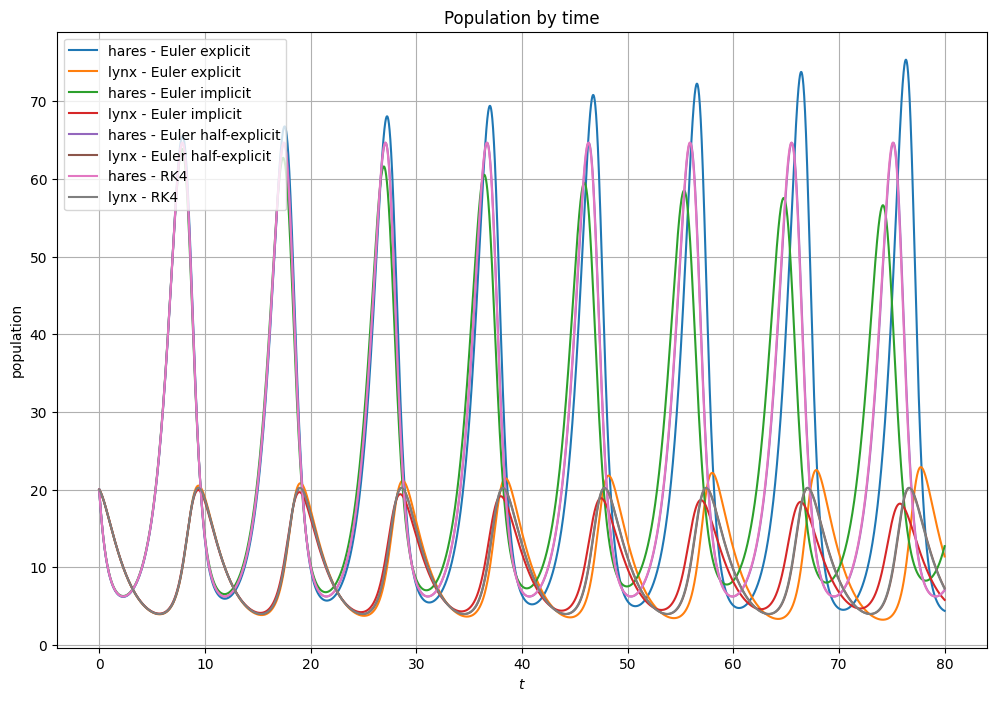

In [71]:
# define labels
labels = [None] * 4
for method in methods:
    labels[method] = [f"hares - {method_names[method]}", f"lynx - {method_names[method]}"]
# plot population by time
plot_results(
    results,
    methods,
    [0, 0],
    [1, 2],
    "Population by time",
    "$t$",
    "population",
    labels
)

Narysowanie wykresów punktu $(x(t), y(t))$

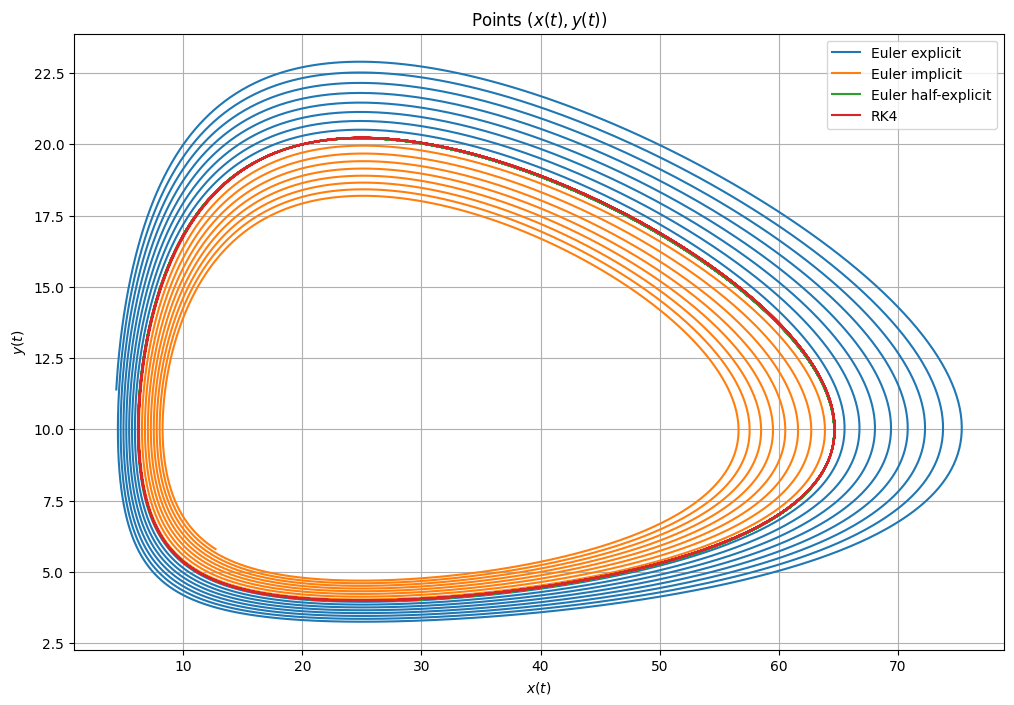

In [67]:
# plot (x(t),y(t))
plot_results(
    results,
    methods,
    [1],
    [2],
    r"Points $(x(t),y(t))$",
    r"$x(t)$",
    r"$y(t)$",
    [[name] for name in method_names]
)

Funkcja niezmiennika

In [63]:
# invariant definition
def H(x, y, a1, b1, a2, b2):
    return b2*x + b1*x - a2*np.log(x) - a1*np.log(y)

Definicja niezmienników

In [66]:
# define invariants
invariants = [None] * 4
for method in methods:
    invariants[method] = [
        H(results[method][1][i], results[method][2][i], alpha1, beta1, alpha2, beta2)
        for i in range(len(results[method][0]))
    ]

Narysowanie niezmienników

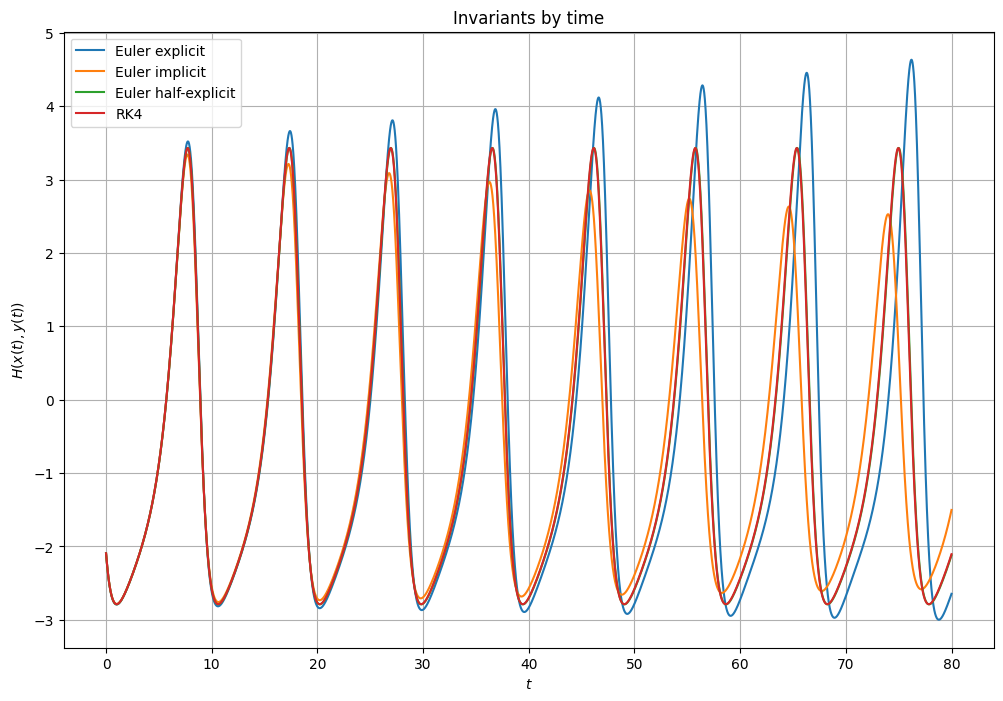

In [70]:
# plot invariants
plot_results(
    [(results[method][0], invariants[method]) for method in methods],
    methods,
    [0],
    [1],
    r"Invariants by time",
    r"$t$",
    r"$H(x(t),y(t))$",
    [[name] for name in method_names]
)